# Let's learn some machine learning to evaluate player overall ratings in FIFA video game

<p>Machine learning is the science to study *algorithms* and *models* that enable computers to recognize things, make decisions, even predict results without explicit instructions. As an example, when talking to your phone assistant such as Siri or Cortana, machine learning helps to translate your voice into text and further understand what you requested. Is that amazing?
</p>
<p>
Today we are going to show you how to *teach* a computer evaluate overall ratings for soccer player based on their attributes step by step.  
</p>
<p> Let's get on to it! </p>

## A little background

<p>
Assume that there's a formula to calculate the "Overall" ratings for soccer players by EA Sports (The developer of FIFA 2019). With this formula, we can easily calculate the overall ratings for any player even he/she is not in the game. The problem is, we don't know what exactly the formula looks like. <br>
We know the *input* which consists of player attributes and the *output* which is the Overall ratings. Then we can use an approach called "regression" to "estimate" the formula based on the input/output.
</p>
<p>
Today, we are going to use a simple model called Linear Regression. 
Let assume the formula that calculates the overall ratings of soccer player $ y = f(x)$ is
\[
    f(x) = ax + b
\]
The linear regression aims to figure out $a$ and $b$. The formula $f(x)$ is called "model" in machine learning, and the process of solve/estimate the model is called "training" the model. Once we trained the model, we can use it to predict target $y$ of new data.
</p>
<p>   
Back to our story, if we only have 1 variable $x$, estimate $f(x)$ should be easy. Everyone should be able to solve it with a pen and a piece of paper. However, when $x$ is a long list of attributes of soccer players like speed, power, passing, tackling, it becomes complicated. The formula should be rewritten into
\[
    f(x_1, x_2, ..., x_n) = a_1 * x_1 + a_2 * x_2 + ... + a_n * x_n + b
\]
Then we have to feed the model with a lot of high-quality data to make the model more closer to the "real" formula. Let's get started!
</p>

## Step 1: get dataset

FIFA 2019 is a video soccer game. All the players in this game have an overall rating as well as a lot of attributes such as crossing, finishing, etc. 

We are heading to the website called kaggle.com to get our dataset. <br>

[FIFA19 dataset](https://www.kaggle.com/karangadiya/fifa19/)

<br>
 *Note: you may need to sign up to get the download link*.
<br>

On this page, you can find a lot of information about this dataset, take some time to browse it and familiarize the dataset.
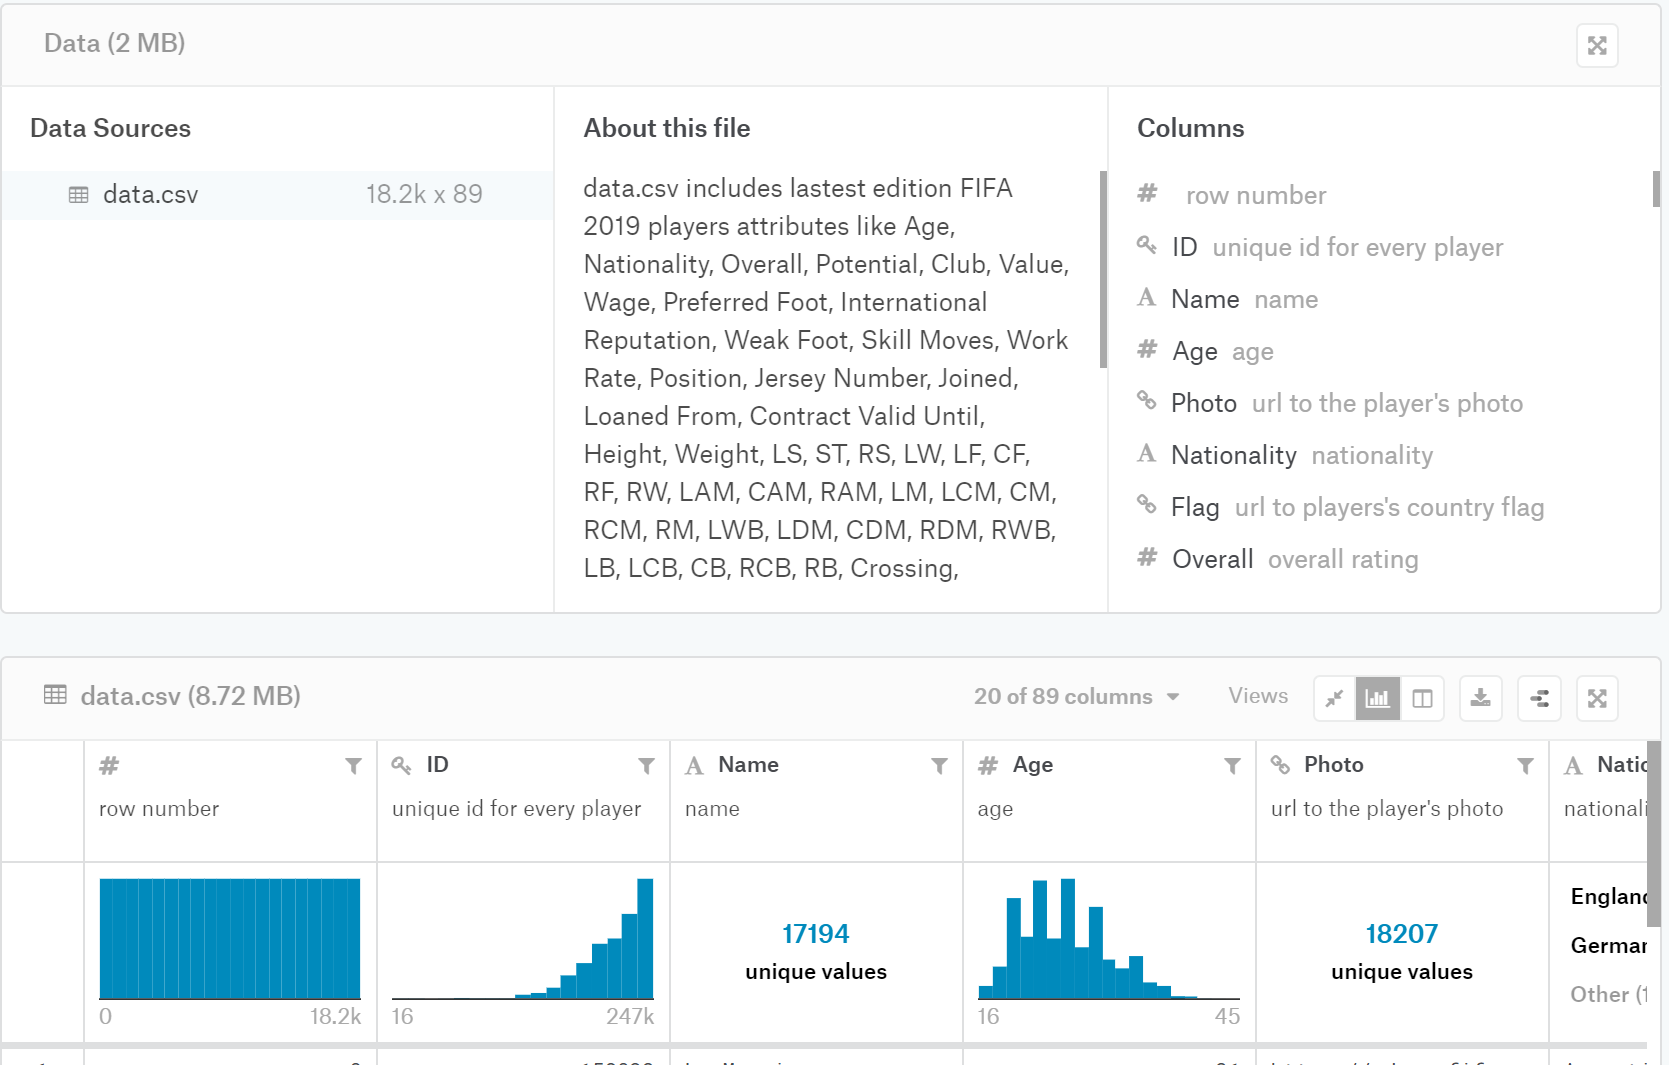

After you download it, extract the zip file to a folder, let's say `C:\fifa_dataset\`.

## Step 2: start the project

Open jupyter notebook, new notebook > python 3

At the beginning of the file, let's import some necessary packages.

In [2]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ImportError: No module named pandas

## Step 3: load dataset
Change `mypath` to the folder you extract the dataset file (i.e., `C:\fifa_dataset\`). To verify we loaded it successfully, we use a function called `describe()` to print its statistics. 

In [3]:
# load datasets
mypath = "C:/Users/ruilliu/Documents/nuevo_lr_fifa/" # change it to your own path
fifa_data = pd.read_csv(mypath+"data.csv")
fifa_data.describe()

NameError: name 'pd' is not defined

## Step 4: Pre-process data

By now, we have imported our dataset. In real life, each soccer player has a specific position. Different positions require  strength in different attributes. So let's narrow down the scope to the striker. 
<br>

First, let's list all the positions.
This statement looks a little bit longer, but it does the work. The `fifa_data['position']` selects position column of the `fifa_data`, the `dropna()` eliminates cells that are blank, and `unique()` remove all duplicated items for us.

In [3]:
# to find out how many positions are there
print(fifa_data['Position'].dropna().unique())

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']


Now we can filter data by position "ST". You're encouraged to select other positions to see what's the difference.

In [4]:
# get players by position
fifa_data_by_pos = fifa_data[fifa_data['Position']=='ST']

Let's plot a histogram for overall ratings of all strikers.

(array([ 40., 186., 363., 463., 601., 341., 113.,  34.,   9.,   2.]),
 array([47. , 51.7, 56.4, 61.1, 65.8, 70.5, 75.2, 79.9, 84.6, 89.3, 94. ]),
 <a list of 10 Patch objects>)

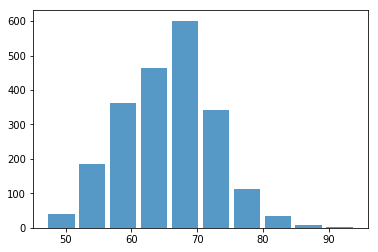

In [24]:
plt.hist(x=fifa_data_by_pos[target], bins=10, alpha=0.75, rwidth=0.85)

Next, we want to split the data into two sets, one is used to train the model, another one is used to verify the trained model is good.

You may think, we should leave as much as possible data for training because it makes the model better. The model fits better, but only for training datasets. When you apply the model to testing data, the prediction accuracy could go down. This is called "overfitting".

Now, we leave 25% of the data for testing.

In [5]:
# split data into train_data and test_data randomly
# you're weclome to change the ratio of test_size to see what will happen
train_data, test_data = train_test_split(fifa_data_by_pos,test_size=0.25)

# print the number of players in train_data and test_data
# len() gives you the number of players in numerical format
# str() converts numerical value into string
print("The # of training data is " + str(len(train_data)))
print("The # of testing data is " + str(len(test_data)))

The # of training data is 1614
The # of testing data is 538


# Step 5: feature selection

Our next step is selecting proper features. Feature selection is a term in machine learning to describe the method and process of choosing relevant features for the model. A feature is one $x$ in the formula. In our story, it is an attribute of a soccer player.

Since we are using the linear regression model, how attribute correlated to the target ("Overall") becomes the criteria to choose the right features.

We use a built-in function correlation `corr` to Compute pairwise correlation of columns. There are three methods we can choose from, 
- pearson : standard correlation coefficient
- kendall : Kendall Tau correlation coefficient
- spearman : Spearman rank correlation

In this tutorial we use pearson.

In [6]:
# select target
target = "Overall"

# To find the correlation among the columns using pearson method 
feature_corr = train_data.corr(method ='pearson') [target]

# sort the features
feature_corr = feature_corr.sort_values(ascending = False)

# show the top 20 features
# note that we are start from 1 not zero, because Overall is alwasy on the top of the list
print(feature_corr[1:21]) 

Positioning        0.904367
Special            0.903856
Finishing          0.899783
BallControl        0.896988
ShotPower          0.877842
Reactions          0.861441
Volleys            0.834433
Composure          0.827529
ShortPassing       0.813074
Dribbling          0.802565
LongShots          0.794059
HeadingAccuracy    0.711129
Vision             0.671054
Skill Moves        0.649300
Curve              0.641426
Crossing           0.603249
Potential          0.593139
Penalties          0.583906
LongPassing        0.575092
FKAccuracy         0.569704
Name: Overall, dtype: float64


Now, we can copy and paste the top 10 or top 12 features. (Note: Please don't copy the space)

In [7]:
# select some features
features = ["Positioning", "Finishing", "Special", "BallControl", 
            "ShotPower", "Reactions", "Volleys", "Composure", "ShortPassing"]

Also, we can just extarct the feature names from the index. Note that, we start from 1 because we do not want include `overall` who is alwasy on the top of the list.

In [8]:
# extract feature names from the series
features = feature_corr[1:21].index.tolist()

# show the features
print(features)

['Positioning', 'Special', 'Finishing', 'BallControl', 'ShotPower', 'Reactions', 'Volleys', 'Composure', 'ShortPassing', 'Dribbling', 'LongShots', 'HeadingAccuracy', 'Vision', 'Skill Moves', 'Curve', 'Crossing', 'Potential', 'Penalties', 'LongPassing', 'FKAccuracy']


## Step 6: train the model
Now we are ready to train the model. we use 'LinearRegression().fit()' to train it. and this model object has a `score()` function to return the score of the model, which is the coefficient of determination R^2 of the prediction. For now you only need to know the higher the better. 

In [9]:
# prepare training data
x_train = train_data[features]
y_train = train_data[target]

# Applying Linear regression
# fit() is the method to train the model
model = LinearRegression().fit(x_train,y_train)

# Model's score
print("Score: " + str(model.score(x_train,y_train)))

Score: 0.9875123836174596


## Step 7: try the model on testing data

Now we are using the trained model to estimate players in `test_data`. Similar to what we do to the `train_data`, we create `x_test` and `y_test`.

`model.predict()` will generate a list of predicted results.

In [13]:
# we would like to sort test data on target value ("Overall")
test_data = test_data.sort_values([target], ascending=False)

x_test = test_data[features]
y_test = test_data[target]

y_pred = model.predict(x_test)

Let's compare with the actual overall ratings

In [14]:
# add a new column of predicted overall to test_data
test_data['Predicted Overall'] = y_pred.copy()

# add a new column of prediction difference ratio to test_data
difference = (y_pred - y_test) / y_test * 100
test_data['Difference (%)'] = difference

# print the results
test_data[["Name", "Nationality", "Club", "Overall", "Predicted Overall", "Difference (%)"]]

,Name,Nationality,Club,Overall,Predicted Overall,Difference (%)
1,Cristiano Ronaldo,Portugal,Juventus,94,91.973701,-2.155638
10,R. Lewandowski,Poland,FC Bayern München,90,88.135513,-2.071652
23,S. Agüero,Argentina,Manchester City,89,87.807637,-1.339733
48,C. Immobile,Italy,Lazio,87,85.933234,-1.226168
159,Louri Beretta,Brazil,Atlético Mineiro,83,81.583941,-1.706096
193,Rodrigo,Spain,Valencia CF,83,81.784946,-1.463921
179,S. Gnabry,Germany,FC Bayern München,83,79.978980,-3.639783
315,David Villa,Spain,New York City FC,82,81.259066,-0.903578
362,Paco Alcácer,Spain,Borussia Dortmund,81,81.836532,1.032756
518,Alexandre Pato,Brazil,Tianjin Quanjian FC,80,78.322831,-2.096461


Is that amazing? With the result, you're confident to use this model to estimate the overall ratings of any soccer player in the world! 

Now let's do some plotting to visualize it.  

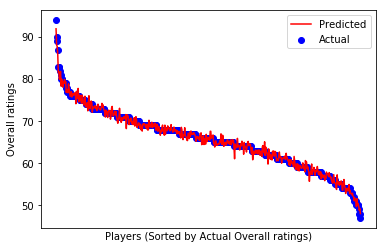

In [15]:
# Plot outputs
plt.scatter(range(0,y_test.shape[0]), y_test,  color='blue', label="Actual")
plt.plot(range(0,y_test.shape[0]), y_pred, color='red', label="Predicted")

# add ticks, labels, legend
plt.xticks(())
plt.xlabel("Players (Sorted by Actual Overall ratings)")
plt.ylabel("Overall ratings")
plt.legend(loc='upper right')
plt.show()

## Conclusion

Well done! You did it!

Next, you can play with this dataset a little bit.
- Try to select players in another position, i.e., goalkeeper ("GK"), what features will be the top correlated ones? what will be the features you selected? 
- Change the features you selected, will it change the model prediction results?
- Change the ratio of training/testing data, see what will happen.
- Change the target variable, for example, 'Value' or 'Wage'. Try to figure out how to convert the content to numerical value (hint: 50k = 50 * 1000, 10M = 10 * 1000 * 1000.

In today's class, you learned how to train a linear regression model to estimate the overall ratings of a soccer player. We hope you enjoyed it and have inspired a little. 

From now, you can explore the [kaggle](http://kaggle.com) website, try to find another dataset to play. Apply linear regression to predict/estimate the results. You'll be amazed by what you can be done.